### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider <b>BoomBikes</b> aspires to understand the demand for shared bikes among the people
The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [207]:
# Import Required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Step 1: Reading and Understanding the Data


In [208]:
# Read Bike data
bikeDf = pd.read_csv("day.csv")

In [209]:
bikeDf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [210]:
# See the Size
bikeDf.shape

(730, 16)

In [211]:
bikeDf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [212]:
# Finding is there any null values
bikeDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [213]:
## all are looking non-null type


In [214]:
# Rename yr,mnth and hum  columns for better readibility

bikeDf.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)


## Step 2: Visualising the Data


In [215]:
# Mapping the season column with seasion name

bikeDf.season = bikeDf.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

#Mapping Month, week and weathersit
bikeDf.month = bikeDf.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bikeDf.weekday = bikeDf.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bikeDf.weathersit = bikeDf.weathersit.map({1:'Clear',2:'Misty',3:'Light Rain',4:'Heavy Rain'})


bikeDf.head()



,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<Figure size 2000x1200 with 0 Axes>

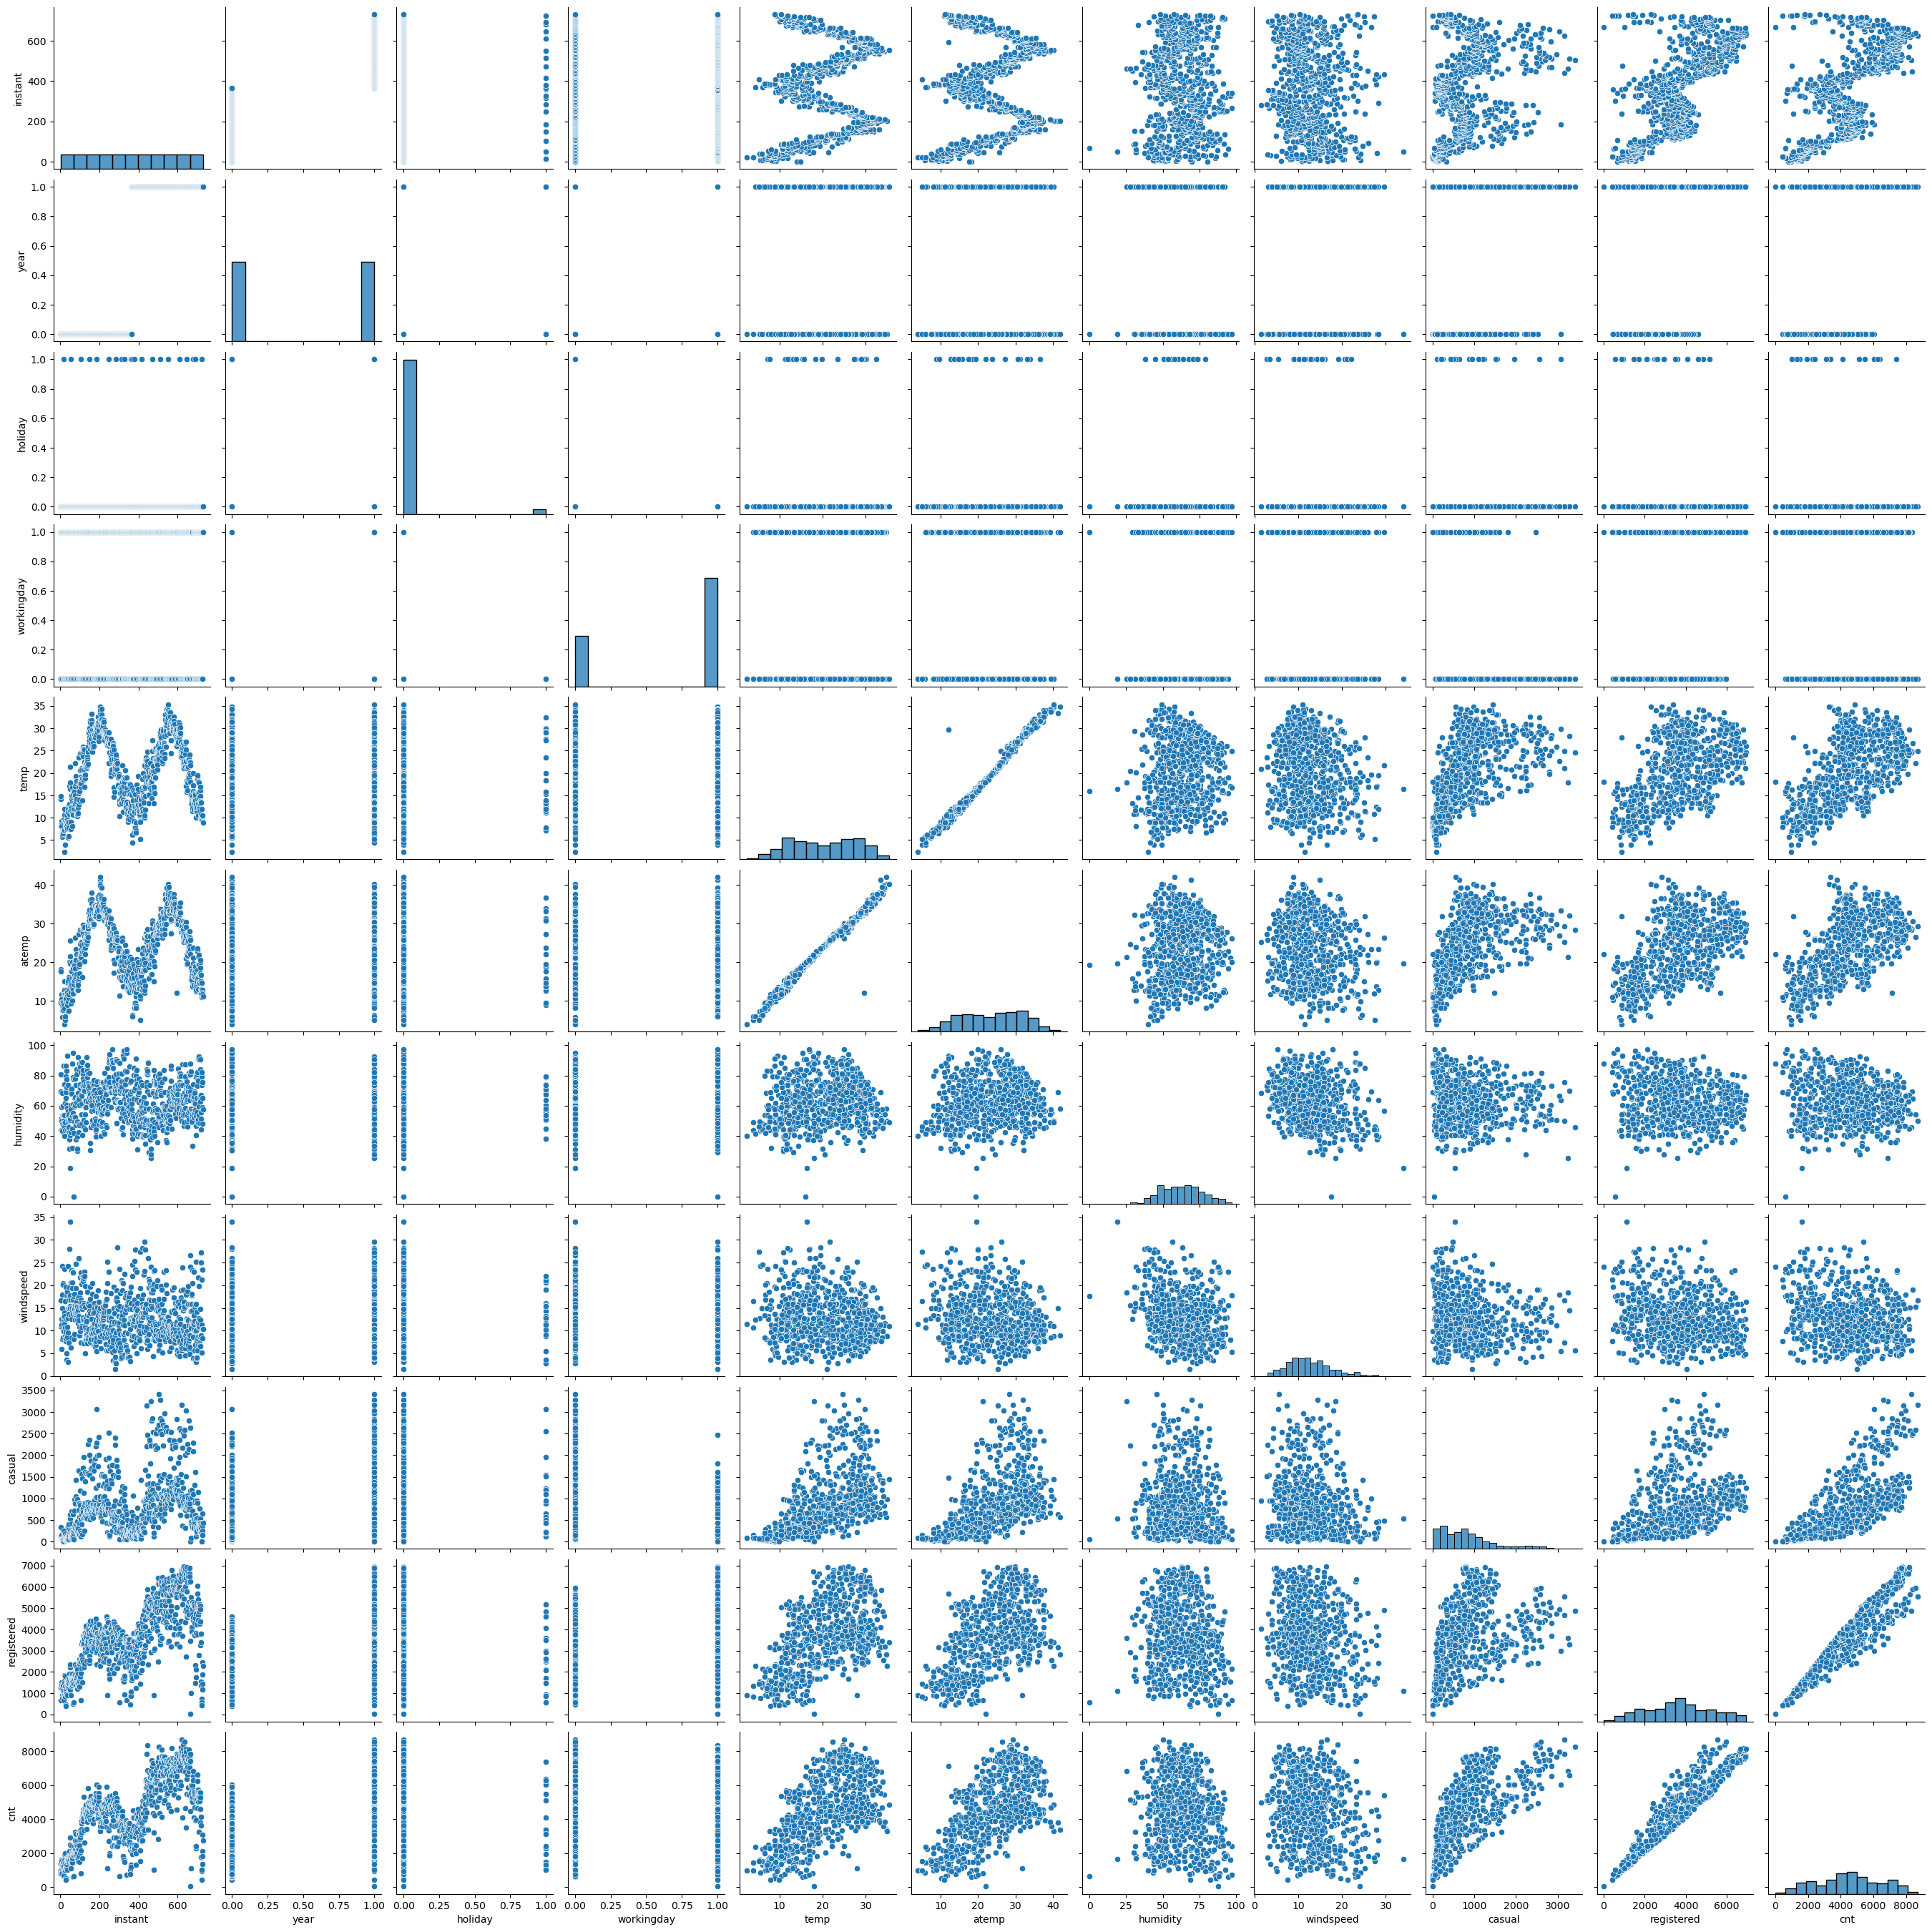

In [216]:
plt.figure(figsize=(20, 12))
sns.pairplot(bikeDf)
plt.show()

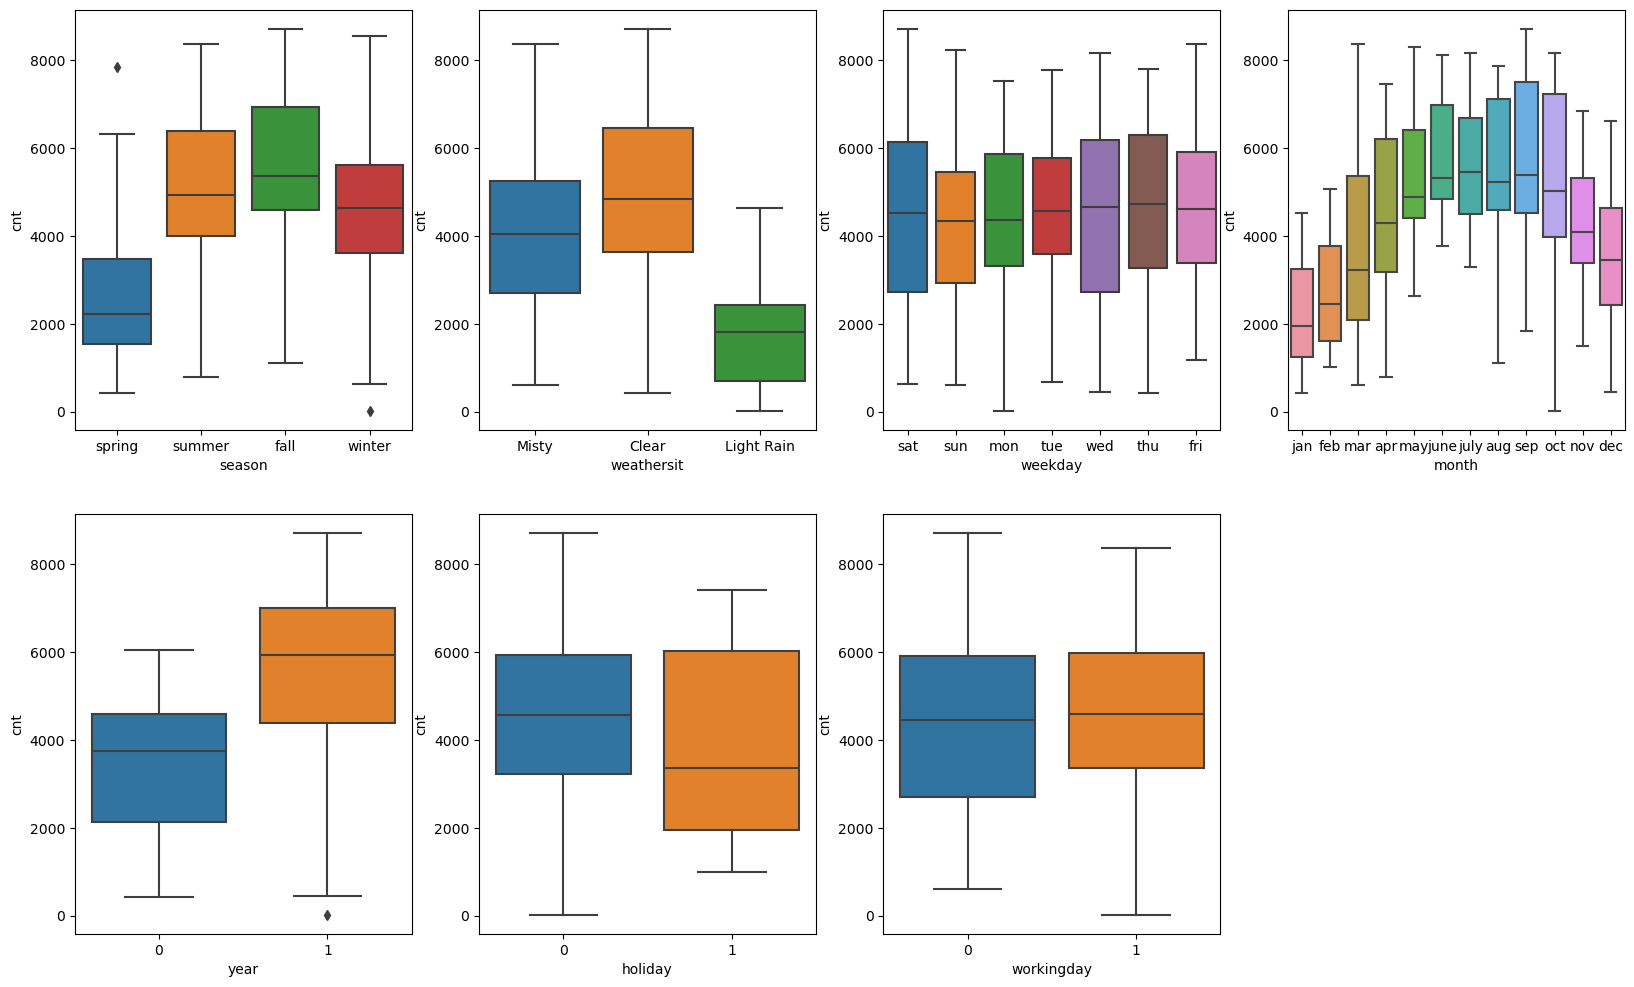

In [217]:
# visualizing the categorical columns

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeDf)
plt.subplot(2,4,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeDf)


plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeDf)
plt.subplot(2,4,4)
sns.boxplot(x = 'month', y = 'cnt', data = bikeDf)
plt.subplot(2,4,5)
sns.boxplot(x = 'year', y = 'cnt', data = bikeDf)

plt.subplot(2,4,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeDf)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeDf)

plt.show()


In [218]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=bikeDf)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=bikeDf, hue='year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()


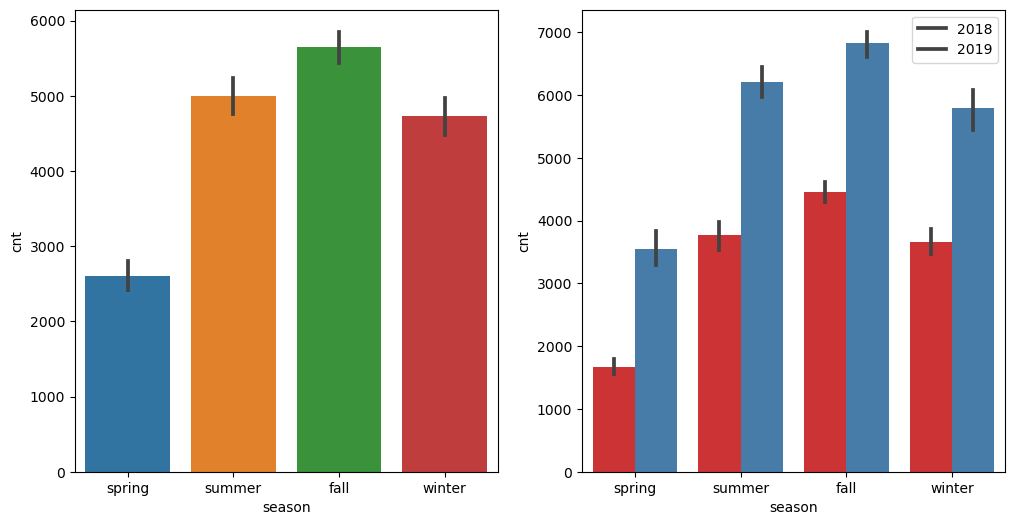

In [219]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Based on Season
plot_cat_columns('season')


#### Seems that <u>Fall</u> seasion has best bookings, then  summer and winter follows and spring is the least
#### Compared to 2018 all season bookings are higher in 2019

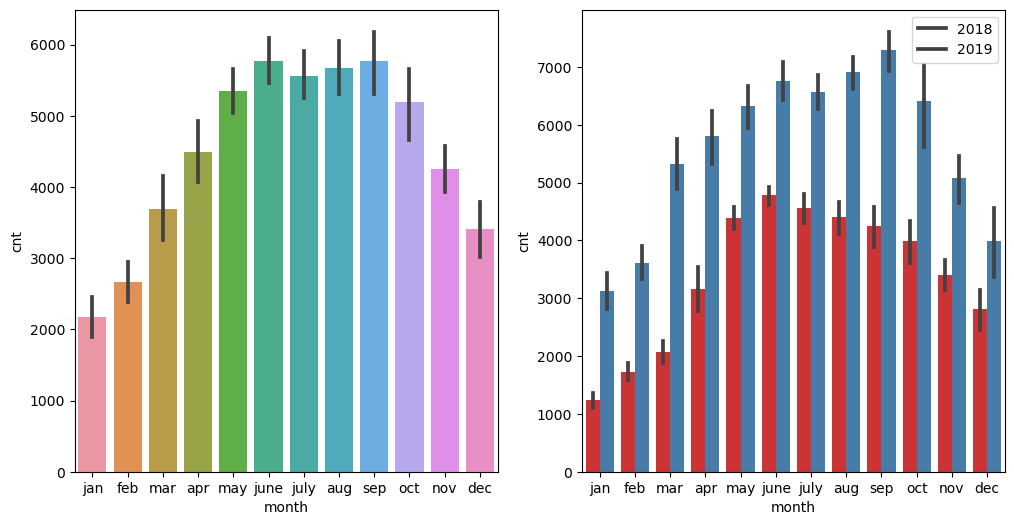

In [220]:
# Based on Month
plot_cat_columns('month')

#### Most sales are happenign in  <u>June, July, Aug and Sep</u> months
#### and as observed above 2019 has more increase in every month

## Step 3: Data Preparation

- Drop unwanted columns


In [221]:
# Droping instant column as it is index column which has nothing to do with target
bikeDf.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bikeDf.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bikeDf.drop(['casual','registered'], axis = 1, inplace = True)


In [222]:
bikeDf.head()


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

- Creation of dummy variables for  month, weekday, weathersit and season Columns using get_dummies
- Add them to the BikeData Frame 
- Drop  month, weekday, weathersit and season columns as we have already created dummies 


In [223]:
# Creation of dummy variables for  month, weekday, weathersit and season Columns using get_dummies

months_df=pd.get_dummies(bikeDf.month,drop_first=True)
weekdays_df=pd.get_dummies(bikeDf.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bikeDf.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bikeDf.season,drop_first=True)

In [224]:
# Adding dummies to the current DataFrame 
bikeDf_new = pd.concat([bikeDf,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
bikeDf_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light Rain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [225]:
#Drop  month, weekday, weathersit and season columns as we have already created dummies

bikeDf_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bikeDf_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light Rain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [226]:
np.random.seed(0)
df_train, df_test = train_test_split(bikeDf_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [227]:
df_train.shape

(510, 30)

In [228]:
df_test.shape

(219, 30)

### Rescaling the Features  using  Min-Max scaling

In [229]:
# Create Object
scaler = MinMaxScaler()

In [230]:
# Apply scaler() to all the columns except  'dummy' variables
num_vars = ['temp','atemp','humidity','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [231]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light Rain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0


In [232]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light Rain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


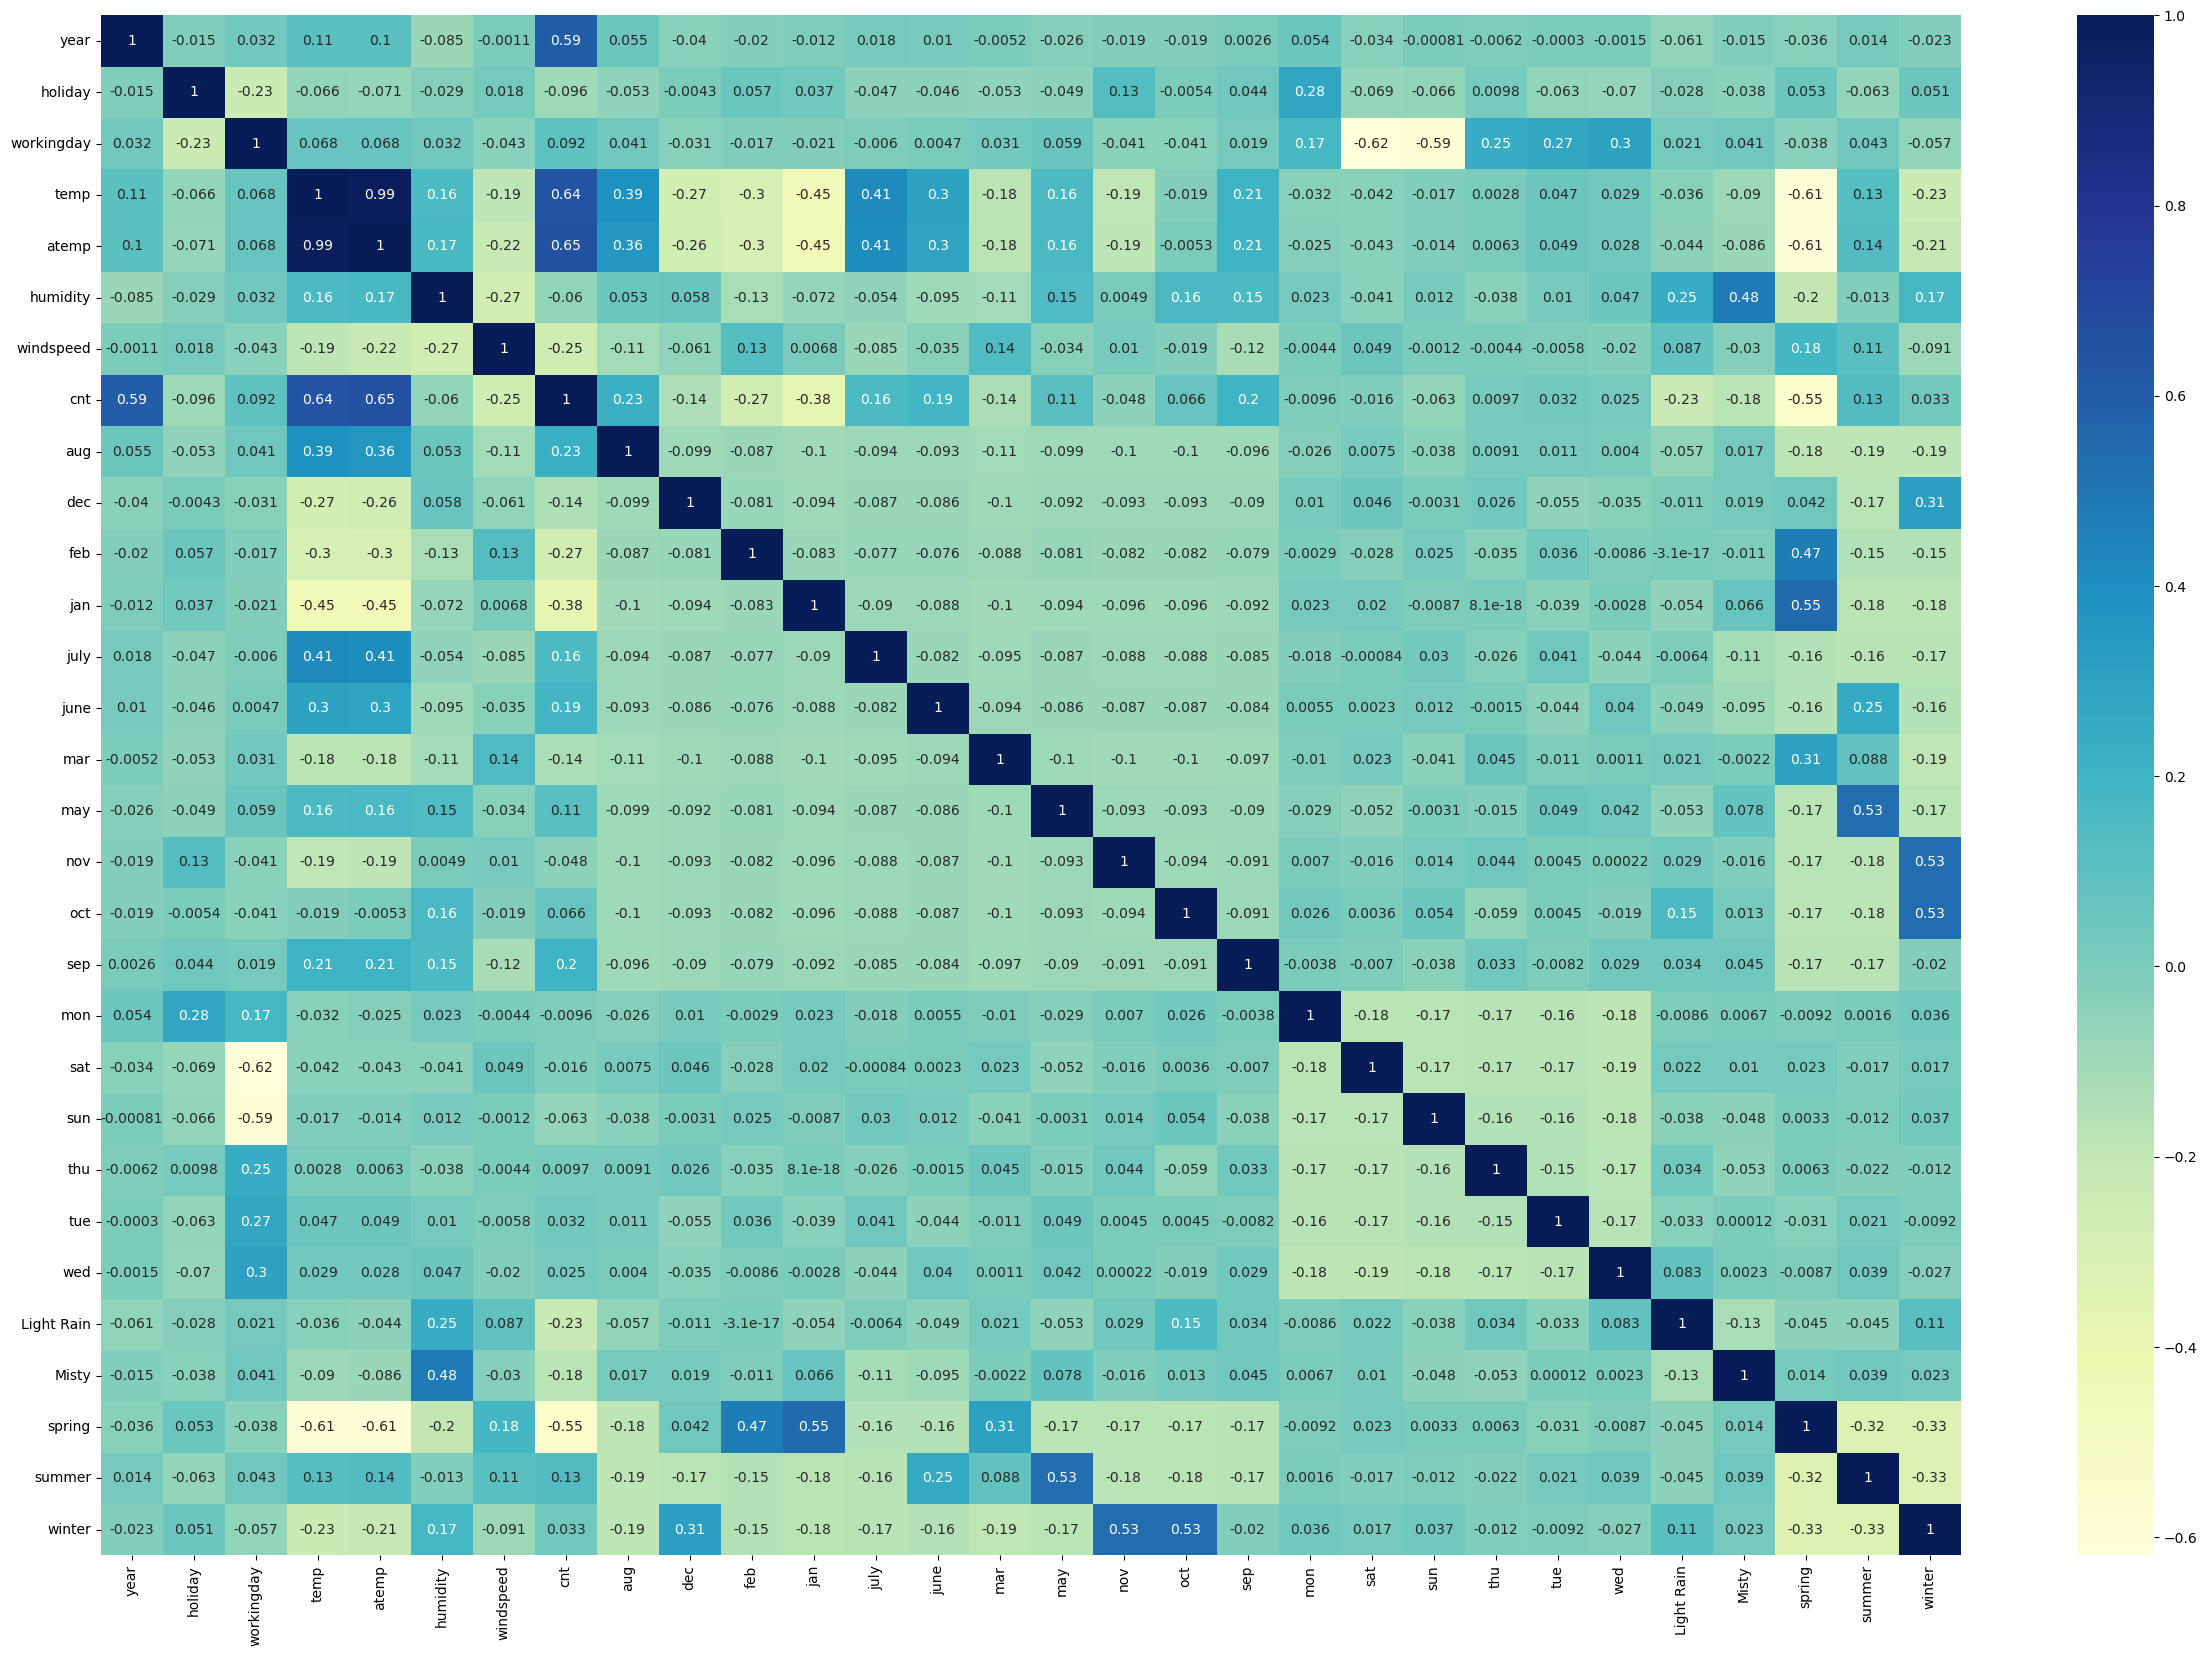

In [233]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Seems, `temp` seems to the correlated to `Cnt` the most. Let's see a pairplot for `Temp` vs `Cnt`.

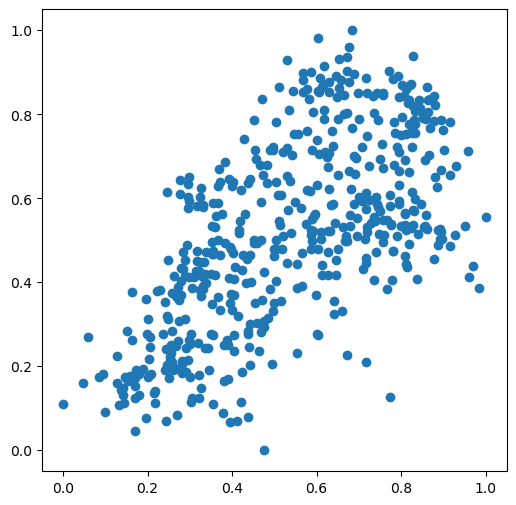

In [234]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### looks there is a +ve relation ship between Temp and cnt
### So, we pick `temp` as the first variable and we'll try to fit a regression line to that.

In [235]:
### Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

In [236]:
# Add Constant 
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [237]:
# Check the parameters obtained

lr.params

const    0.169798
temp     0.639952
dtype: float64

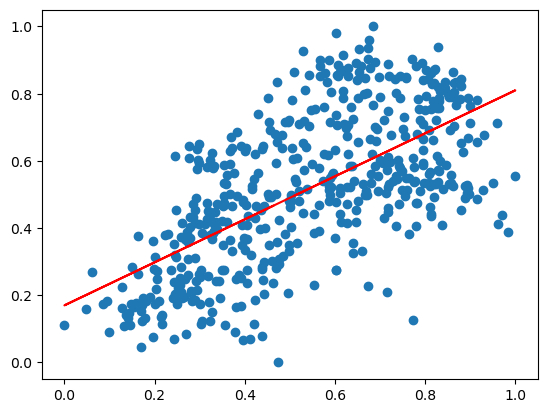

In [238]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.170 + 0.640*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [239]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           5.80e-61
Time:                        19:25:00   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

### Using `RFE`( Recursive feature elimination) 

In [240]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [241]:

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 15)             
rfe = rfe.fit(X_train, y_train)

In [242]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 2),
 ('dec', False, 2),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', False, 2),
 ('june', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sep', True, 1),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('Light Rain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1)]

In [243]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'sep', 'sat', 'sun', 'Light Rain', 'Misty', 'spring', 'winter'],
      dtype='object')

In [244]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'july', 'june', 'mar', 'may', 'nov',
       'oct', 'mon', 'thu', 'tue', 'wed', 'summer'],
      dtype='object')

In [245]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [246]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [247]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,41.44
8,sat,10.12
9,sun,9.80
3,temp,2.76
12,spring,2.71
1,holiday,2.57
4,humidity,1.87
13,winter,1.81
11,Misty,1.57
6,jan,1.54


### Building model using statsmodel, for the detailed statistics

In [248]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [249]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [250]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.1
Date:                Sun, 12 Feb 2023   Prob (F-statistic):          2.98e-187
Time:                        19:25:00   Log-Likelihood:                 504.57
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     496   BIC:                            -921.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2565      0.026      9.943      0.0

In [251]:
# As humidity shows high VIF 0.038 values hence we can drop it
X_train_new = X_train_rfe.drop(["humidity"], axis = 1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.8
Date:                Sun, 12 Feb 2023   Prob (F-statistic):          3.83e-186
Time:                        19:25:00   Log-Likelihood:                 499.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     497   BIC:                            -917.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2025      0.020     10.127      0.0

In [254]:
# We can drop holiday variable as it has high p-value
X_train_new = X_train_new.drop(['holiday'], axis = 1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.8
Date:                Sun, 12 Feb 2023   Prob (F-statistic):          3.83e-186
Time:                        19:27:42   Log-Likelihood:                 499.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     497   BIC:                            -917.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1859      0.035      5.278      0.0

In [255]:
# We can drop holiday variable as it has high p-value
X_train_new = X_train_new.drop(['sun'], axis = 1)

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.3
Date:                Sun, 12 Feb 2023   Prob (F-statistic):          1.62e-186
Time:                        19:28:13   Log-Likelihood:                 497.21
No. Observations:                 510   AIC:                            -970.4
Df Residuals:                     498   BIC:                            -919.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2327      0.026      9.004      0.0

In [259]:
X_train_new.columns

Index(['const', 'year', 'workingday', 'temp', 'windspeed', 'jan', 'sep', 'sat',
       'Light Rain', 'Misty', 'spring', 'winter'],
      dtype='object')

In [260]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [261]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.53
1,workingday,4.47
3,windspeed,4.08
9,spring,2.36
0,year,2.06
6,sat,1.80
4,jan,1.61
8,Misty,1.54
10,winter,1.43
5,sep,1.16


## Residual Analysis of the train data


In [267]:
y_train_cnt = lm.predict(X_train_lm)

In [268]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

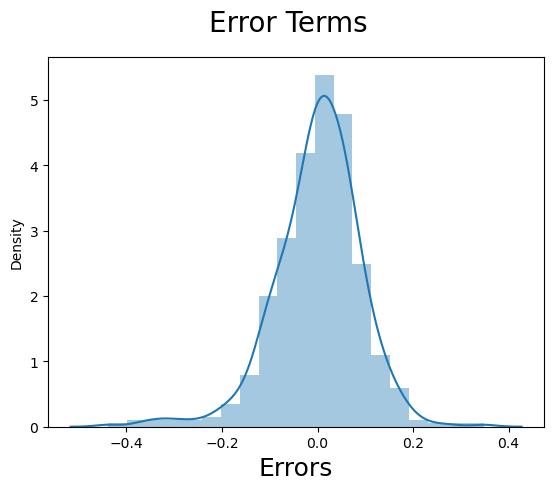

In [269]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Making Predictions

#### Applying the scaling on the test sets


In [270]:
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [271]:
y_test = df_test.pop('cnt')
X_test = df_test

In [272]:
 # Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [273]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation


Text(0, 0.5, 'y_pred')

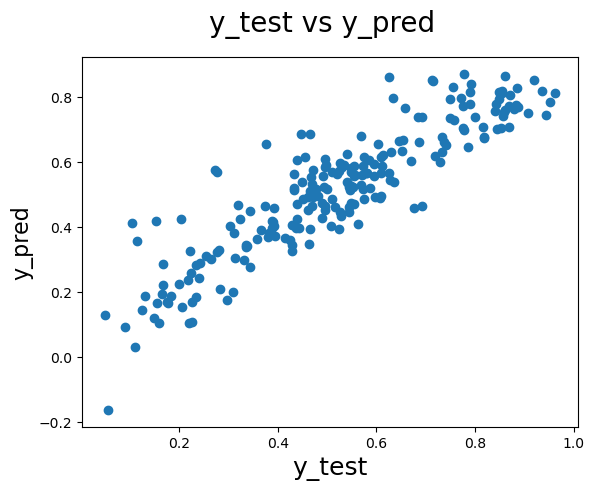

In [274]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [275]:
round(lm.params,4)


const         0.2327
year          0.2364
workingday    0.0558
temp          0.3903
windspeed    -0.1474
jan          -0.0500
sep           0.0665
sat           0.0665
Light Rain   -0.2941
Misty        -0.0792
spring       -0.1053
winter        0.0440
dtype: float64

# Fitting Equation is


$  Cnt = 0.2327 + (0.2327 * year) + (0.0558 * workingday) + (0.3903 * temp)- (0.1474 * windspeed) - (0.0500* jan) + (0.0665*sep)+(0.0665 * sat) - (0.2941 * Light Rain)- (0.0792*Misty)-(0.1053*spring)+(0.0440 * winter) $


In [277]:
r2 = r2_score(y_test, y_pred)
round(r2,4)


0.8026

In [278]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7724


## Comparison between Training and Test data Set
- Train dataset R^2          : 0.835
- Test dataset R^2           : 0.831


- Train dataset Adjusted R^2 : 0.829    
- Test dataset Adjusted R^2  : 0.772